In [1]:
from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:65% !important; }</style>"))

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import neural_net as nn

In [2]:
# Select an objective task
#obj = 'logistic-reg'
obj = 'linear-reg'

# Create labels
def ground_prediction(x1_i, x2_i):
    if obj == 'logistic-reg':
        return np.bitwise_xor(x1_i, x2_i)
    elif obj == 'linear-reg':
        return x1_i + x2_i
    
    
# Create samples, two-dimensional input    
n_samples = 1000
X1 = np.random.choice(np.random.randint(0, 10000, 10000), n_samples)
X2 = np.random.choice(np.random.randint(10000, 20000, 10000), n_samples)
X1 = np.random.choice(np.random.randint(0, 2, 10000), n_samples)
X2 = np.random.choice(np.random.randint(0, 2, 10000), n_samples)
X = np.asarray([X1, X2]).transpose()


# Here if needed you can normalize the data
# scaler = MinMaxScaler(feature_range=(-1, 1))
# scaler.fit(X)
# X_norm = scaler.transform(X)
X_norm = X

# Get the labels for each sample
y = list()
for i in np.arange(X.shape[0]):
    y_i = ground_prediction(X[i,0], X[i,1])
    y.append(y_i)
    
y = np.asarray(y) 

# y = y.reshape(-1,1)
# scaler_y = MinMaxScaler(feature_range=(-1, 1))
# scaler_y.fit(y)
# y_norm = scaler_y.transform(y)
y_norm = y

In [6]:
nn_test = nn.NeuralNet([2, 2, 3, 2, 1], batch_size=32, objective=obj)
nn_test.train(X=X_norm, Y=y_norm, r=9e-2, iterations=5000, shuffle=False, check_grad=True)

Gradient Checking is Matching!
Gradient Checking is Matching!
Gradient Checking is Matching!
Gradient Checking is Matching!
Gradient Checking is Matching!


In [7]:
y_fitted = nn_test.train_fitted()

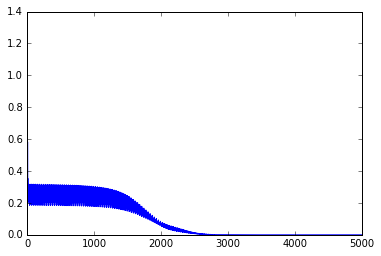

In [8]:
plt.plot(nn_test.obj_history)
plt.show()